In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
Pandas: 1.1.5
Numpy: 1.19.5
Sklearn: 0.22.2.post1
Matplotlib: 3.2.2
Keras: 2.6.0


In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [4]:
# read the csv
cleveland = pd.read_csv('drive/MyDrive/LKIR_LIPI/input/heart.csv')

In [5]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [6]:
# print the last twenty or so data points
cleveland.loc[1:50]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [7]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [8]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [9]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


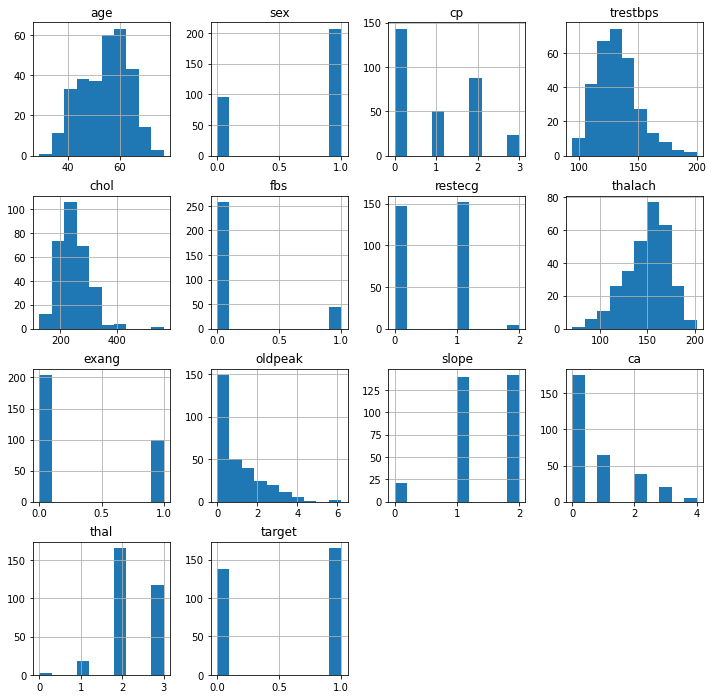

In [12]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

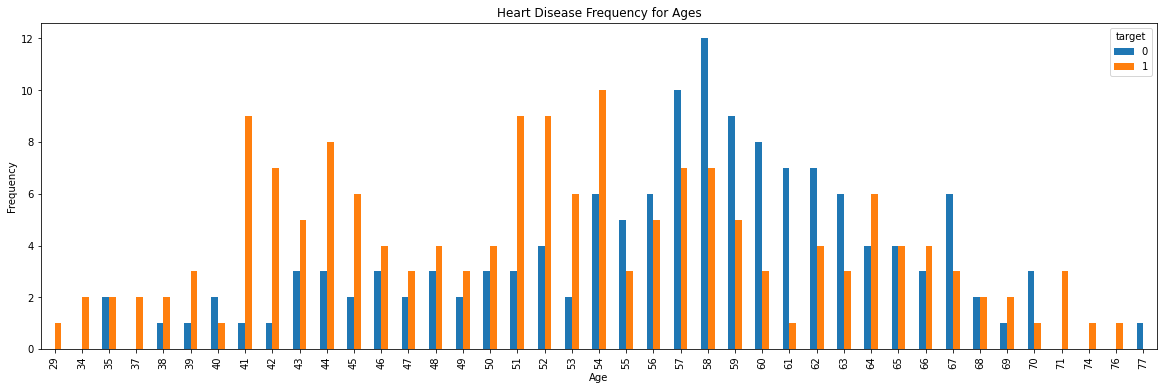

In [13]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

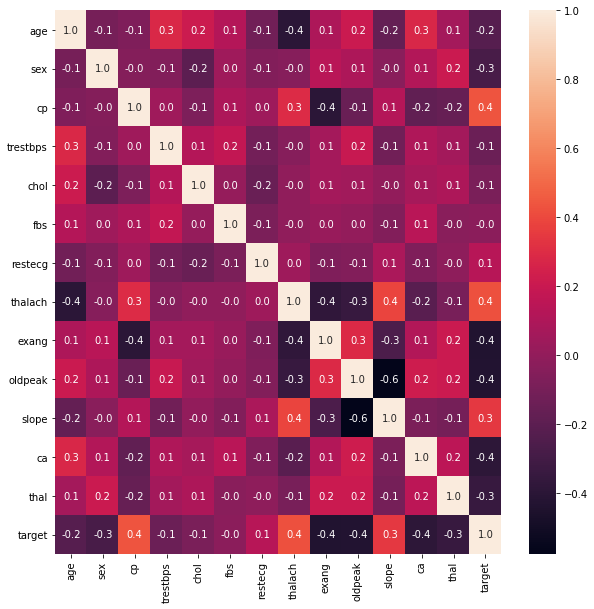

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

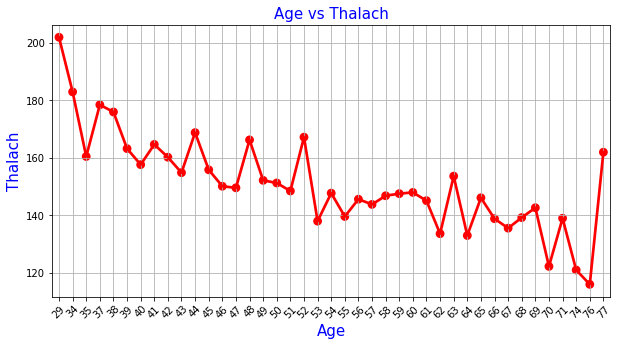

In [15]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [16]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [17]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [33]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
print(mean.shape, std)
np.save("mean.npy",mean)
np.save("std.npy",std)

(13,) [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [20]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=0, test_size = 0.2)

In [21]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [22]:
X_train[0]

array([ 0.18017482,  0.68100522, -0.93851463, -0.09273778,  0.70994041,
        2.394438  , -1.00583187, -2.03989095,  1.43548113,  0.48345117,
       -2.27457861, -0.71442887,  1.12302895])

In [23]:
# membuat arsitektur ANN
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model(): # create model
    model = Sequential()
    model.add(Dense(10, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(6, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.005)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 5

In [24]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=200, batch_size=32)
model.save('my_model1.h5')  


Epoch 1/200
8/8 [==============================] - 1s 34ms/step - loss: 0.6932 - accuracy: 0.5372 - val_loss: 0.6926 - val_accuracy: 0.5410
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5455 - val_loss: 0.6918 - val_accuracy: 0.5410
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5455 - val_loss: 0.6913 - val_accuracy: 0.5410
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5455 - val_loss: 0.6907 - val_accuracy: 0.5410
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5455 - val_loss: 0.6901 - val_accuracy: 0.5410
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5455 - val_loss: 0.6891 - val_accuracy: 0.5410
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5455 - val_loss: 0.6873 - val_accuracy: 0.5410
Epoch 8/200
8/8 [=========

In [25]:
# Keras reported accuracy:
score = model.evaluate(X_train, Y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(X_test, Y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

model train data score       :  92 %
model test data score        :  85 %


In [26]:
# save and load
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [27]:
# save and load
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

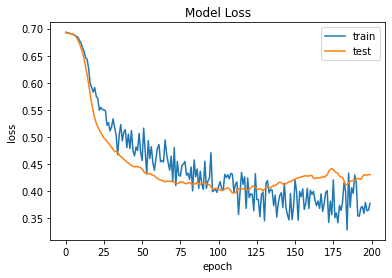

In [28]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [29]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

# print(Y_train_binary[:100])
print(X[15:16])
print(model.predict(X[15:16]))


[[-0.48155814 -1.46841752  1.00257707 -0.66386682 -0.52689046 -0.41763453
   0.89896224  0.36528682 -0.69663055  0.48345117 -0.64911323 -0.71442887
  -0.51292188]]
[[2.7519933e-04 9.9972481e-01]]


In [30]:
 # define a new keras model for binary classification
def create_binary_model():
 # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
# print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))


Results for Categorical Model
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [32]:
data_prediksi = X[0:1]
prediksi = model.predict(data_prediksi)
